In [13]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [14]:
X =fish.loc[:, ['Weight','Length','Diagonal','Height','Width']]
y =fish.loc[:, 'Species']

In [15]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
scaled_X = standardScaler.transform(X)
scaled_X = pd.DataFrame(scaled_X, columns = X.columns)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, random_state=42)

In [17]:
X_train

,Weight,Length,Diagonal,Height,Width
26,0.901423,0.616357,0.809851,1.729771,0.995252
137,0.284919,1.552460,1.449233,-0.470660,0.284746
146,-1.095210,-1.677098,-1.695835,-1.638070,-1.938409
90,-0.807975,-0.600578,-0.667639,-0.807098,-0.251406
66,-0.723906,-0.722272,-0.693560,-0.101433,-0.668307
...,...,...,...,...,...
71,-0.275539,-0.226137,-0.192423,0.561004,-0.109185
106,-0.415654,-0.038916,-0.157862,-0.269289,-0.126918
14,0.565148,0.335526,0.516081,1.400378,0.448270
92,-0.695883,-0.553773,-0.624438,-0.509980,-0.472174


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_svm = SVC(random_state=0, max_iter=1000)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(pred_svm[:5])

decision = clf_svm.decision_function(X_test[:5])

print(decision)

from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_test, y_test))

A1 = pd.DataFrame(data = np.round(proba, decimals=3), columns=[clf_svm.classes_])
A1


['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[ 1.74493104  4.18292134  6.28862158  0.74221452  5.27164405  2.84240138
  -0.27280034]
 [ 0.76080382  2.7988931   5.26938934  1.76088977  4.16950119  6.28555114
  -0.27406389]
 [ 1.78600321  2.75800614  5.28298485  6.26257984  4.2515237  -0.27517258
   0.74542485]
 [ 3.02509348  4.16550321  6.28378072  1.76590284  5.26775046 -0.28611043
   0.76302478]
 [ 1.74844837  3.96063557  6.29347454  2.77595693  5.27920824 -0.2585718
   0.73606732]]
[[0.007 0.08  0.653 0.003 0.236 0.021 0.001]
 [0.003 0.02  0.237 0.007 0.079 0.654 0.001]
 [0.007 0.019 0.241 0.643 0.086 0.001 0.003]
 [0.025 0.078 0.651 0.007 0.236 0.001 0.003]
 [0.007 0.064 0.664 0.02  0.241 0.001 0.003]]
0.7983193277310925
0.85


,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.007,0.080,0.653,0.003,0.236,0.021,0.001
1,0.003,0.020,0.237,0.007,0.079,0.654,0.001
2,0.007,0.019,0.241,0.643,0.086,0.001,0.003
3,0.025,0.078,0.651,0.007,0.236,0.001,0.003
4,0.007,0.064,0.664,0.020,0.241,0.001,0.003



--- SVM Classifier ---
0.85
[[11  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  3  0  0  0  0]]


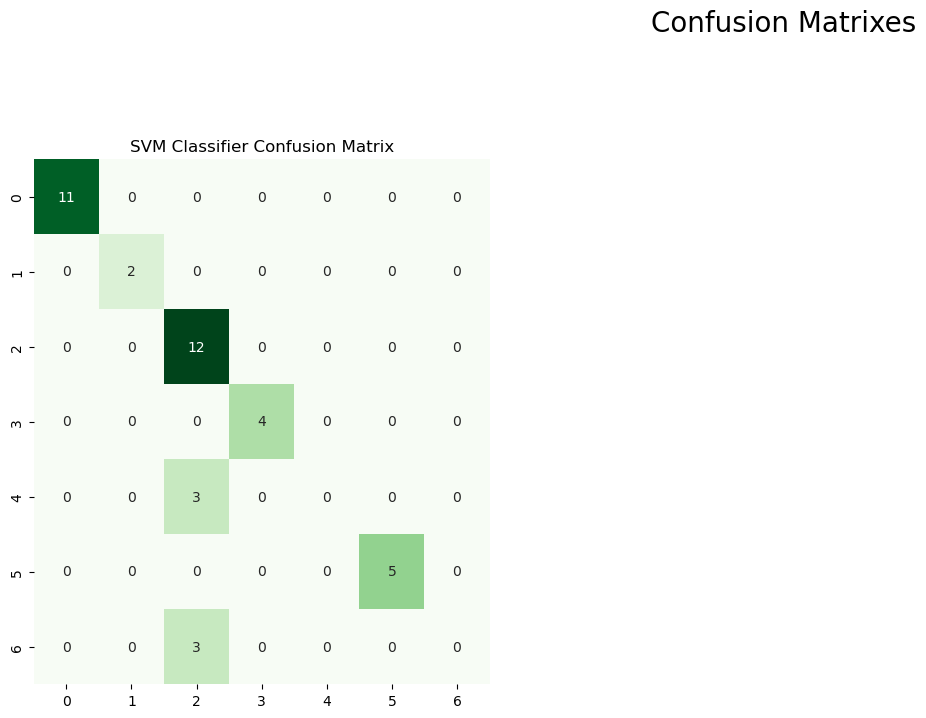

In [46]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("SVM Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_svm),cbar=False,annot=True,cmap="Greens",fmt="d")
plt.show()


--- Decision Tree Classifier ---
0.75
[[11  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  5  0  7  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  1  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  2  0  1]]


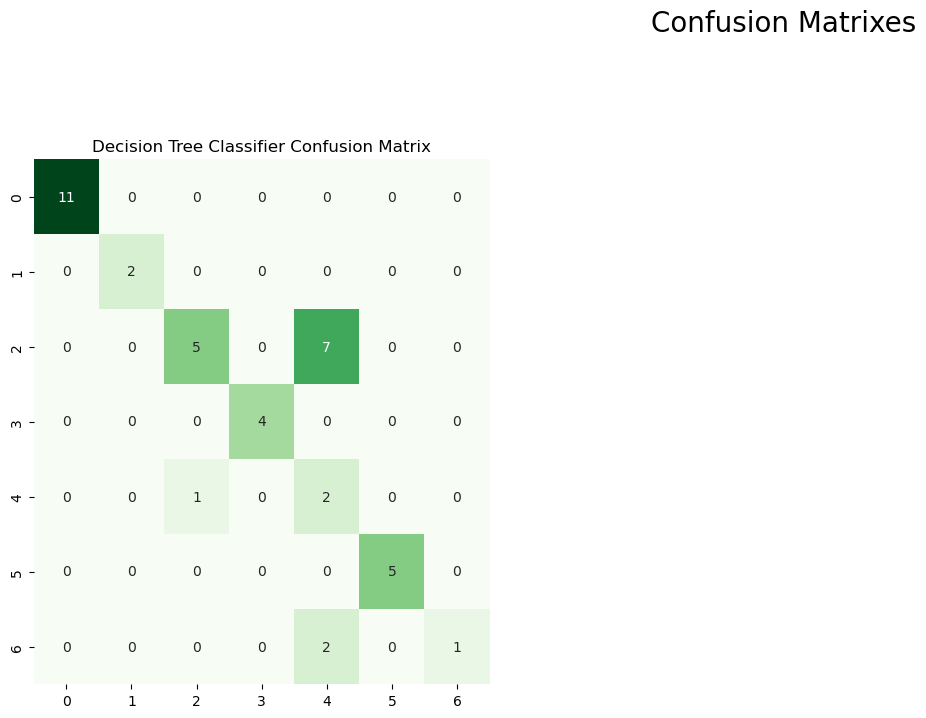

In [48]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_dt),cbar=False,annot=True,cmap="Greens",fmt="d")
plt.show()


--- Radom Forest ---
0.75
[[11  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  7  0  5  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  2  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  2  0  1  0  0]]


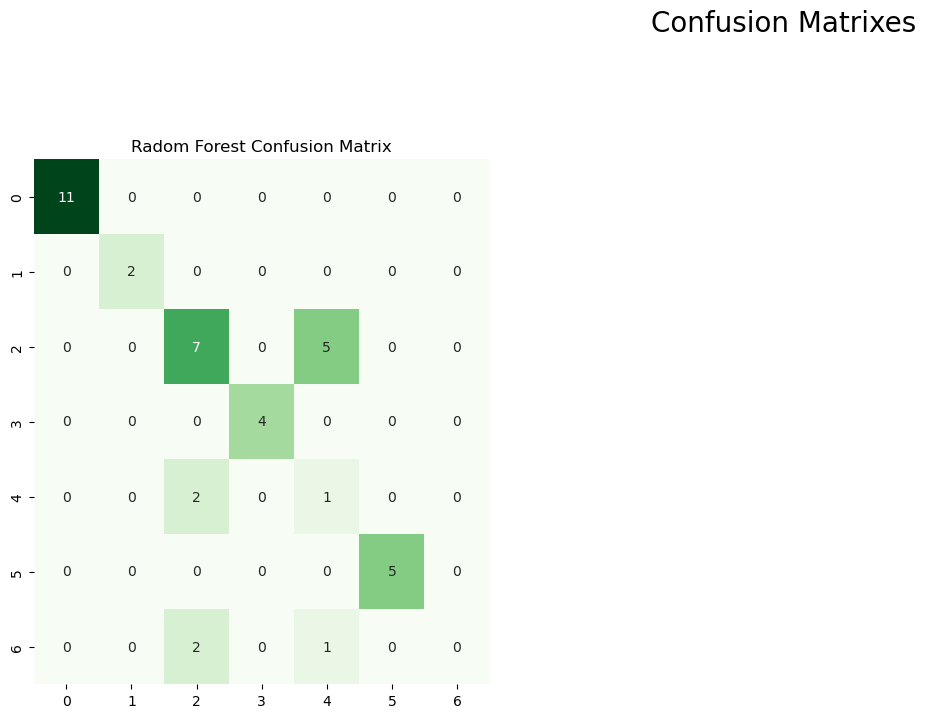

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Radom Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred),cbar=False,annot=True,cmap="Greens",fmt="d")
plt.show()


--- Logistic Regression Classifier ---
0.85
[[11  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  3  0  0  0  0]]


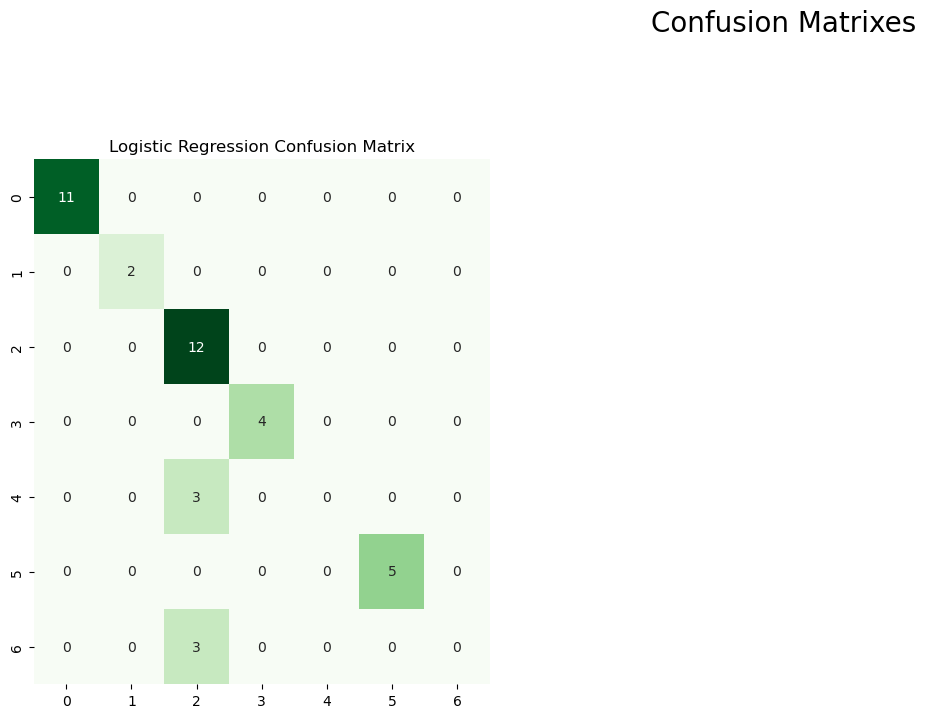

In [50]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_lr),cbar=False,annot=True,cmap="Greens",fmt="d")
plt.show()
